In [52]:
import platform
import sys
import os
print("This jupyter notebook is running on Python " + platform.python_version())
assert sys.version_info >= (3, 10)

This jupyter notebook is running on Python 3.10.12


In [53]:
%pip install mastodon.py
%pip install python-dotenv
%pip install pandas


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [54]:
from mastodon import Mastodon
from dotenv import load_dotenv
load_dotenv()

Mastodon.create_app(
    's23-21',
    api_base_url = 'https://mastodon.social', #this is determined by your chosen server, if you picked the general server, dont change this line
    to_file = 'client_credentials.secret'
);

In [55]:
mastodon_username = os.environ.get("MASTODON_USERNAME")
mastodon_password = os.environ.get('MASTODON_PASSWORD')

API = Mastodon(client_id = 'client_credentials.secret',)
API.log_in(
    mastodon_username, #no caps
    mastodon_password,
    to_file = 'user_credentials.secret'
);

In [56]:
parties = [
["VVD","Volkspartij voor Vrijheid en Democratie"],
["D66", "Democraten 66"],
["GLPvdA", "GL", "PvdA", "GROENLINKS / Partij van de Arbeid", "GL/PvdA", "GroenLinks/PvdA"],
["PVV", "Partij voor de Vrijheid"],
["CDA", "Christen-Democratisch Appel"],
["SP", "Socialistische Partij"],
["FvD", "Forum voor Democratie"],
["PvdD", "Partij voor de Dieren"],
["CU", "ChristenUnie"],
["Volt"],
["JA21"],
["SGP", "Staatkundig Gereformeerde Partij"],
["DENK"],
["50PLUS"],
["BBB","Boeren Burger Beweging"],
["BIJ1"],
["Piratenpartij", "Piratenpartij – De Groenen", "De Groenen", "PP"],
["BVNL", "Belang van Nederland", "Groep Van Haga"],
["NSC", "Nieuw Sociaal Contract"],
["Splinter"],
["LP", "Libertaire Partij"],
["LEF", "Voor de Nieuwe Generatie"],
["SvN", "Samen voor Nederland"],
["PLAN", "Nederland met een PLAN"],
["PvdS","PartijvdSport"],
["PPvB", "Politieke Partij voor Basisinkomen"],
]

# accounts = {}
# for party in parties:
#     accounts[party[0]] = {}
#     for name in party:
#         print(name)
#         accounts[party[0]][name] = API.account_search(f'{name} "officiele" "official"')

In [57]:
import json
import datetime

# Remove datetime objects from accounts dictionary
def remove_datetime(obj):
    if isinstance(obj, datetime.datetime):
        return None
    return obj

# Save accounts to JSON file
# with open('_accounts.json', 'w') as file:
#     json.dump(accounts, file, default=remove_datetime)


In [58]:
official_accounts = {
    "d66": {"bunnik": "D66Bunnik@mastodon.online"},
    "pvdd": {"national": "PartijvoordeDieren@mastodon.nl", "nijmegen": "PvdDNijmegen@mastodon.nl"},
    "piratenpartij":{"national": ["Piratenpartij@mastodon.nl", "Piratenpartij@social.globalpirates.net" ]},
    "bij1": {"national": "BIJ1@social.bij1.org", "utrecht": "UtrechtBIJ1@social.bij1.org"},
    "pvdagl": {"de ronde venen": "PvdAGLDRV@mastodon.nl", "overijssel":"pvdaoverijssel@mastodon.nl"},
    "fvd": {"*national": "fvdemocratie"},
    "volt": {"national": "voltnederland@mastodon.nl"}
}

mapped_accounts = {}

for party, branches in official_accounts.items():
    for branch, account in branches.items():
        server = account.split("@")[1] if "@" in account else "mastodon.online"
        if server not in mapped_accounts:
            mapped_accounts[server] = {}
        if party not in mapped_accounts[server]:
            mapped_accounts[server][party] = {}
        mapped_accounts[server][party][branch] = account


In [59]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_nested_dict(dictionary, k=.5):
    G = nx.Graph()

    def add_nodes_edges(dictionary, parent_node=None, level=0):
        for key, value in dictionary.items():
            node = f"{parent_node}.{key}" if parent_node else key
            G.add_node(node, level=level)  # Add level as an attribute to the node
            if parent_node:
                G.add_edge(parent_node, node)
            if isinstance(value, dict):
                add_nodes_edges(value, parent_node=node, level=level+1)

    add_nodes_edges(dictionary)
    pos = nx.spring_layout(G, k=k)

    # Get the highest level
    highest_level = min(nx.get_node_attributes(G, 'level').values())

    # Assign different node colors based on the level
    node_colors = ['lightblue' if G.nodes[node]['level'] != highest_level else 'orange' for node in G.nodes]

    nx.draw(G, pos, with_labels=True, node_size=1000, node_color=node_colors, font_size=8, font_weight='bold', edge_color='gray')
    plt.show()

def visualize_dictionary_per_key(dictionary):
    for k, v in dictionary.items():
        new_dict = {}
        new_dict[k] = v
        visualize_nested_dict(new_dict)

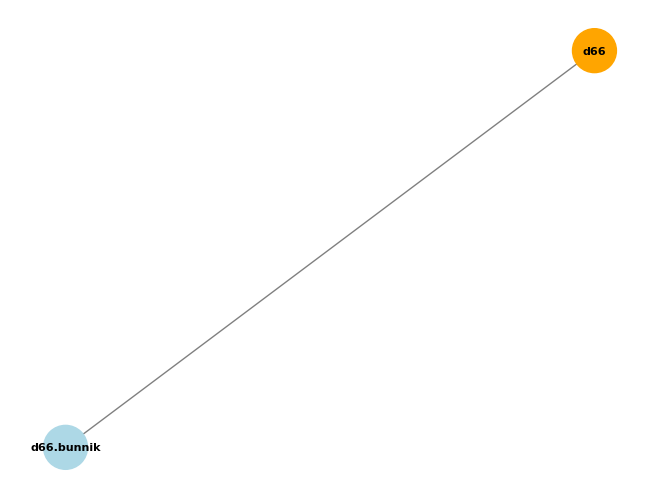

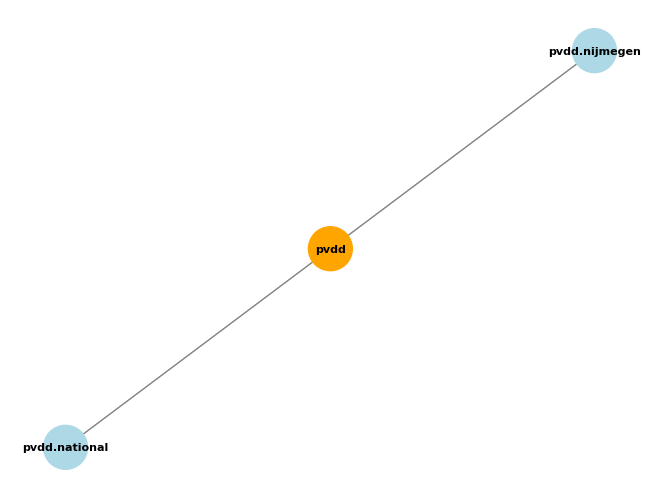

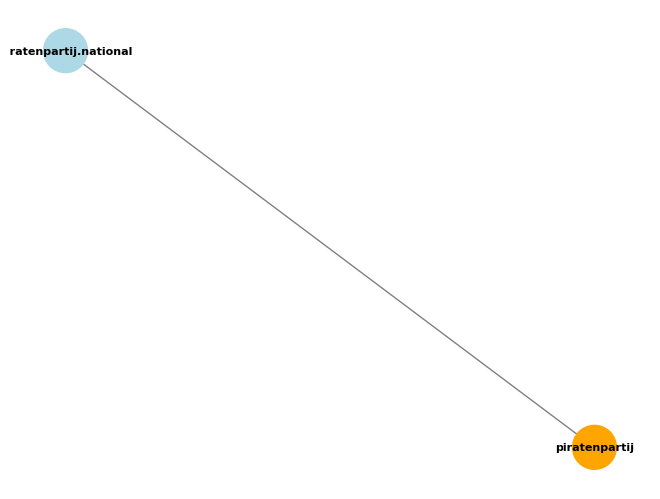

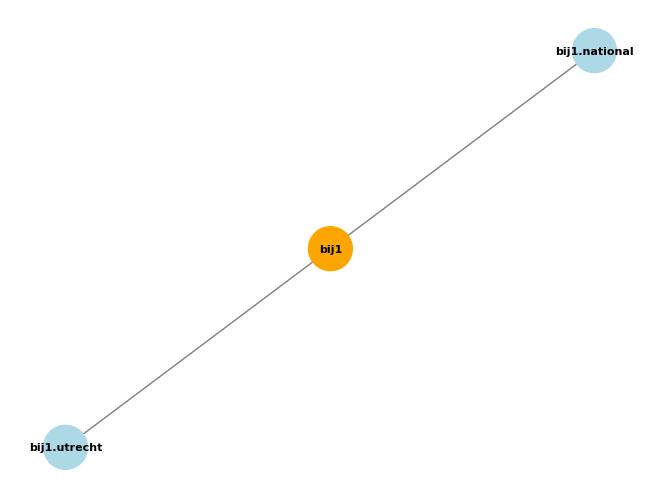

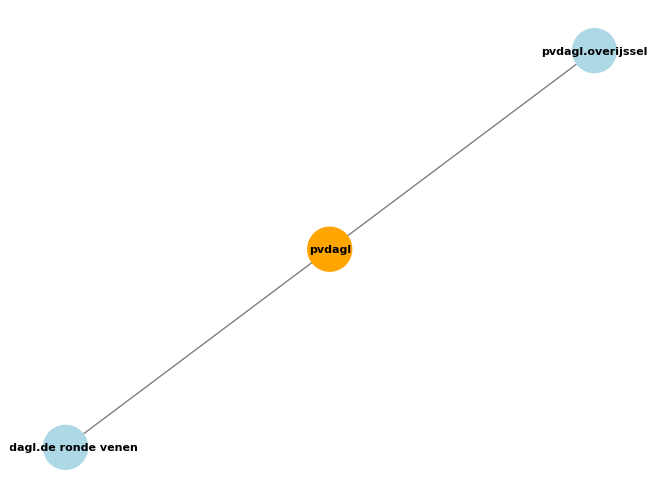

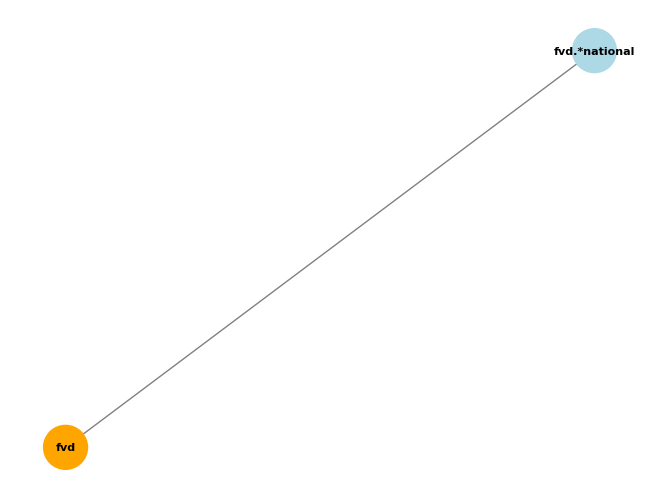

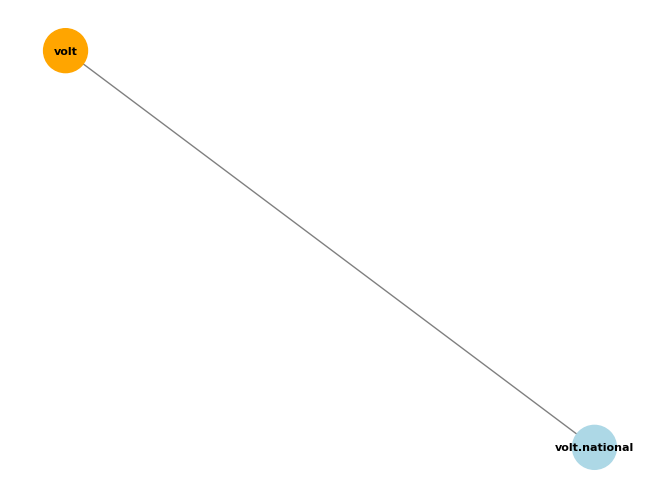

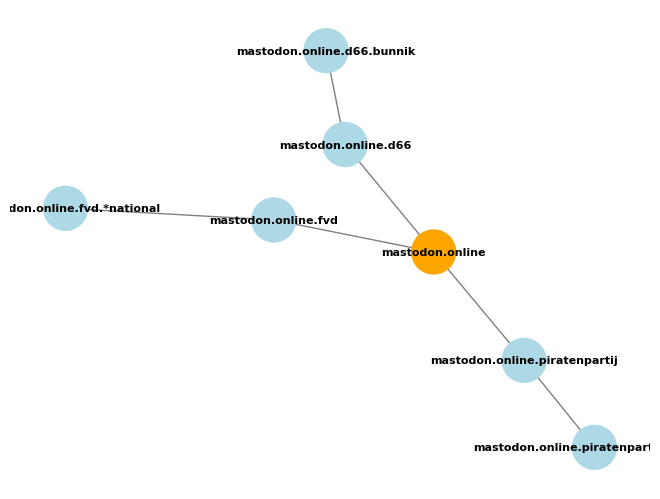

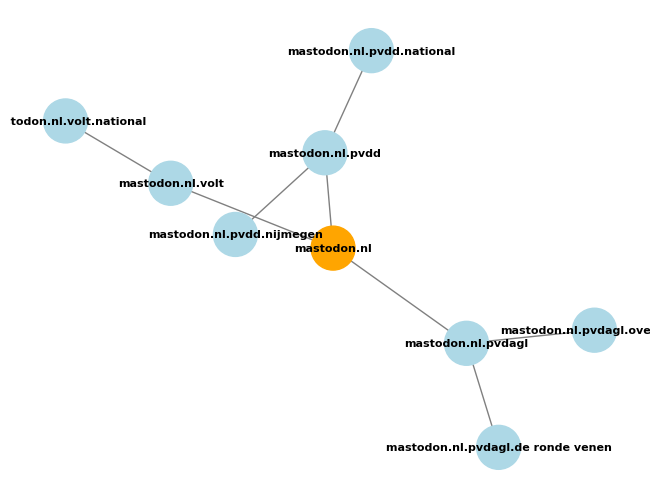

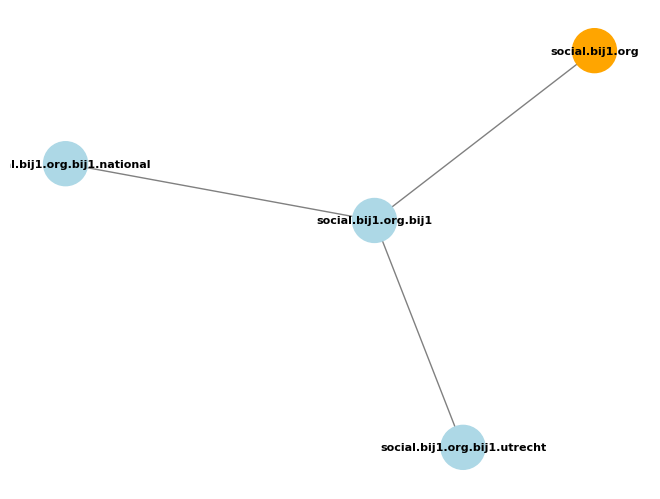

In [60]:
visualize_dictionary_per_key(official_accounts)
visualize_dictionary_per_key(mapped_accounts)

In [61]:
from IPython.display import display, HTML #for formatting HTML script

search = API.search_v2("verkiezingen")
for status in search["statuses"]:
    display(HTML(status["content"]))